<a href="https://colab.research.google.com/github/Amr-Kasber/Regression/blob/main/Linear%20regression/co2Emission/co2emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Co2Emission

This notebook was created during taking the course (pyhon for machine learning). That is the first course of the IBM AI engineer certification.
This notebook is created for learning purposes, and it tackles the problem of predicting the co2Emission for cars.

## 1. Data understanding
This phase includes the following:
1. Gathering the data.
2. Explaining the attributes.
3. Data exploration
4. Summarizing conclusions.

In [16]:
# importing the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = "https://raw.githubusercontent.com/Amr-Kasber/Regression/main/Linear%20regression/co2Emission/FuelConsumptionCo2.csv"
df = pd.read_csv(path);

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### The data contains these attributes
*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

### Data exploration

In [12]:
# gathering only the relevant features
relevant = df.select_dtypes(exclude = "object");
relevant.drop(["MODELYEAR", "FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB_MPG"], axis = 1, inplace = True)
relevant.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [13]:
# calculating the correlation
relevant.corr()["CO2EMISSIONS"]

ENGINESIZE              0.874154
CYLINDERS               0.849685
FUELCONSUMPTION_COMB    0.892129
CO2EMISSIONS            1.000000
Name: CO2EMISSIONS, dtype: float64

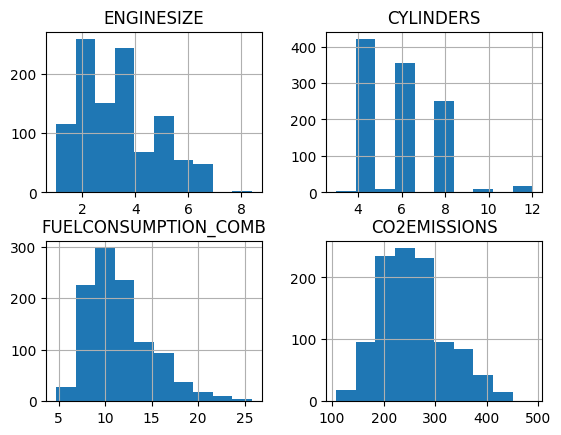

In [17]:
relevant.hist()
plt.show()

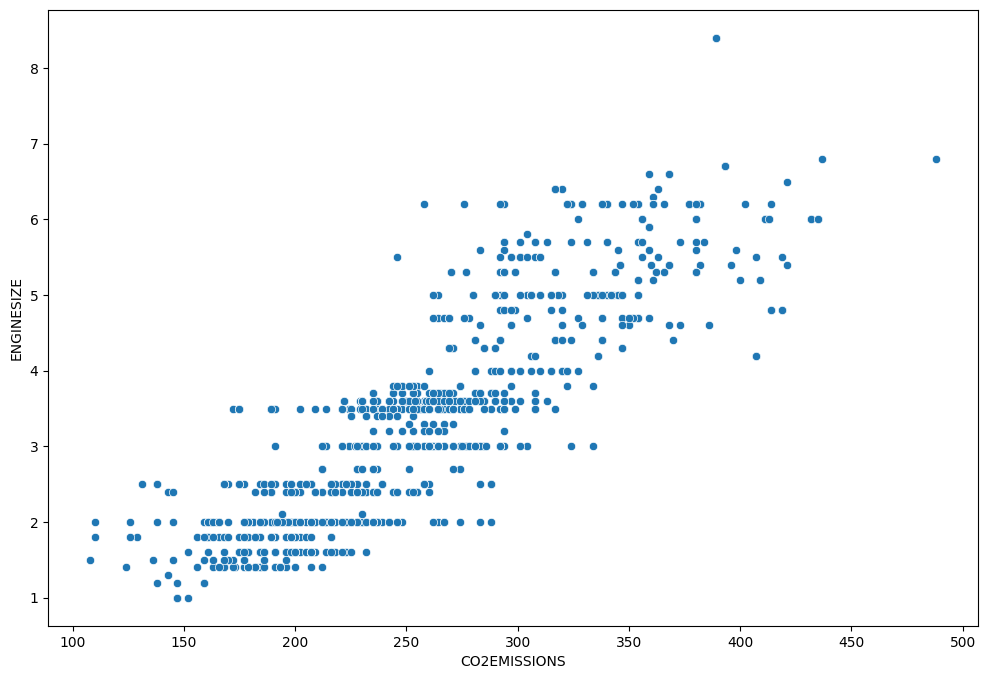

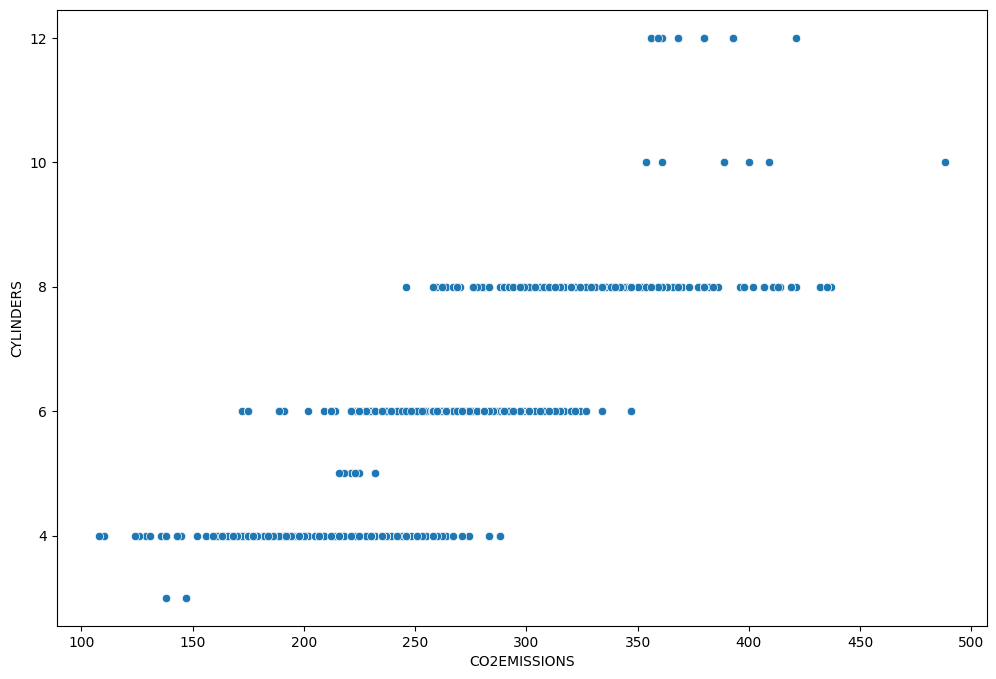

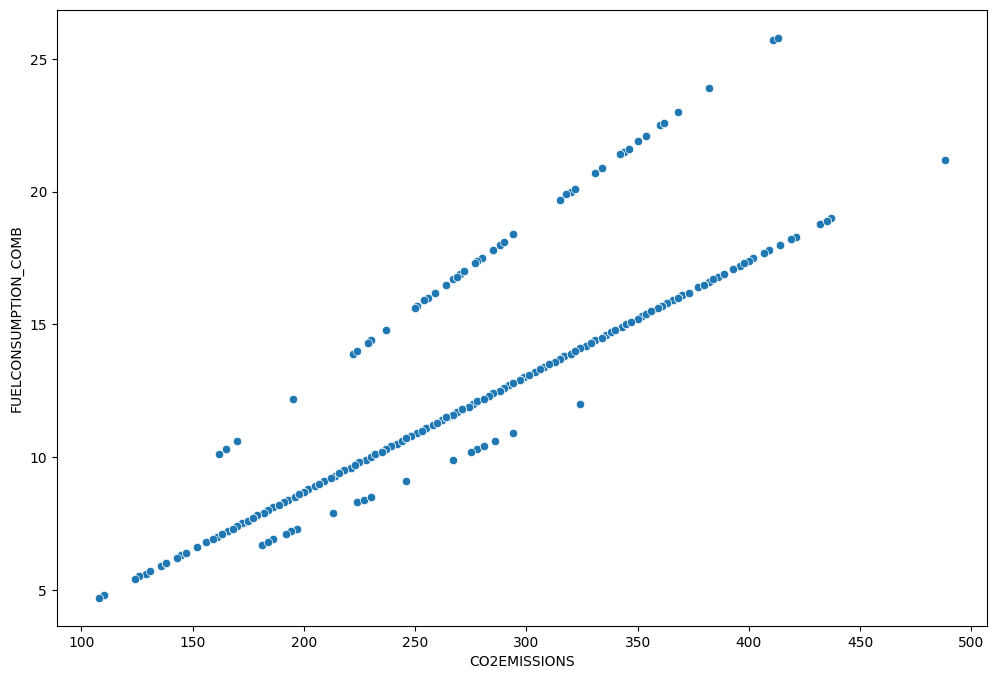

In [37]:
# now we need to explore how each variable is related to the co2emissions
relation = relevant.columns
relation = relation.drop("CO2EMISSIONS");

for col in relation:
  plt.figure(figsize = (12,8))
  sns.scatterplot(x = relevant["CO2EMISSIONS"], y = relevant[col])
  plt.show()

## 2. Modelling

In [78]:
# SPlitting the data for modelling
msk = np.random.rand(len(df)) < 0.8
train = relevant[msk]
test = relevant[~msk]

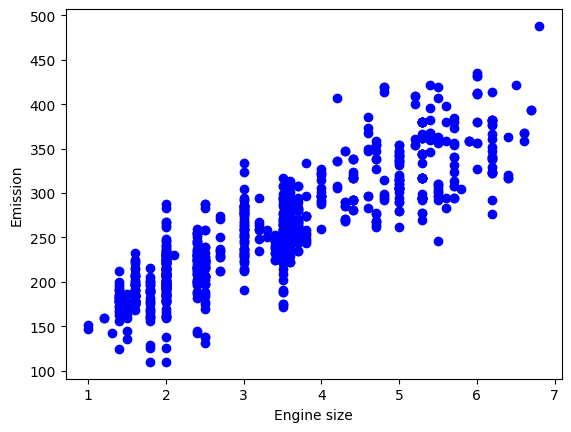

In [79]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

**Simple regression model**

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

In [80]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.62726277]]
Intercept:  [123.88163431]


Text(0, 0.5, 'Emission')

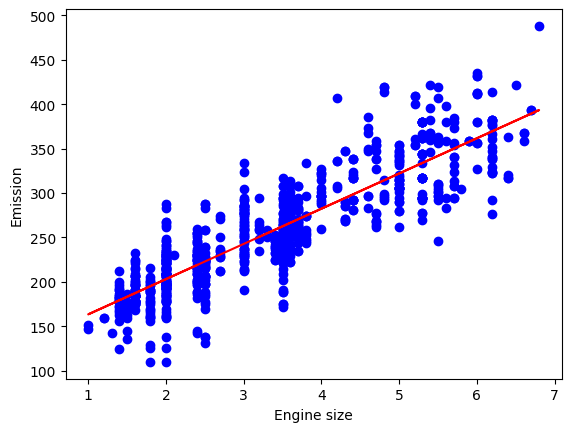

In [81]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Model evaluation


In [82]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.27
Residual sum of squares (MSE): 911.02
R2-score: 0.77
